Nombre d'évènements extrèmes détectés:42
Nombre d'événements détectés : 2
Nombre d'événements détectés après le filtre des frames : 2


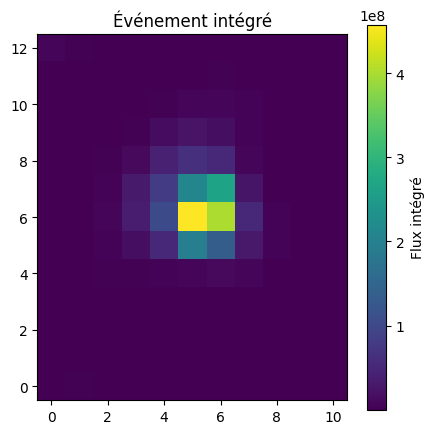

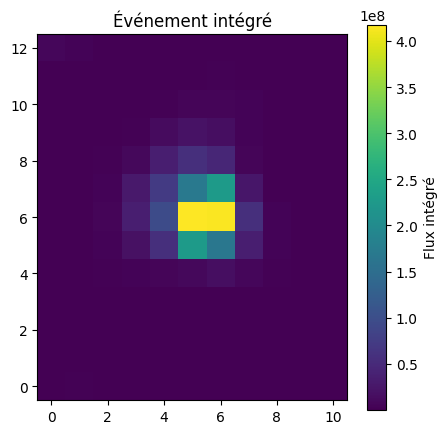

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from astropy.io import fits
Base= fits.open("Base de donnée.fits")
data=Base[1].data
Flux=data['FLUX']
temps=data['TIME']
x_center, y_center=6, 6
fluxdelétoile= data['FLUX'][:,y_center-1:y_center+2, x_center-1:x_center+2].mean(axis=(1,2))
fluxétoilelisse=median_filter(fluxdelétoile, size=5)
étoile_lisse=median_filter(fluxdelétoile,size=5)
flux_sans_nan=étoile_lisse[(~np.isnan(étoile_lisse))&(étoile_lisse>0)]
median_flux=np.nanmedian(flux_sans_nan)
std_flux=np.nanstd(flux_sans_nan)
seuilfiltrehaut=median_flux+3*std_flux
seuilfiltrebas=median_flux-3*std_flux
extreme_idx=np.where((étoile_lisse>seuilfiltrehaut)|(étoile_lisse<seuilfiltrebas))[0]
print(f"Nombre d'évènements extrèmes détectés:{len(extreme_idx)}")
all_pixels = data['FLUX'].reshape(-1)
bg_std = np.nanstd(all_pixels)
valid_idx=np.where(~np.isnan(temps))[0]
event_indices=[]
signal_threshold=median_flux+3*bg_std
current_event = []
for i in valid_idx:
    image_i = data['FLUX'][i]
    if np.all(np.isnan(image_i)):
        below = True
    else:
        peak_flux = np.nanmax(image_i)
        below = peak_flux < signal_threshold

    if not below:
        current_event.append(i)

    else:
        if current_event:
            event_indices.append(current_event)
            current_event = []

if current_event:
    event_indices.append(current_event)


print(f"Nombre d'événements détectés : {len(event_indices)}")
MIN_LENGTH =  1
event_indices = [e for e in event_indices if len(e) >= MIN_LENGTH]
print(f"Nombre d'événements détectés après le filtre des frames : {len(event_indices)}")
for event in event_indices:
    images = np.array([data['FLUX'][i] for i in event])

    image_integrated = np.nansum(images, axis=0)
    plt.figure(figsize=(5, 5))
    plt.imshow(image_integrated, origin='lower', cmap='viridis')
    plt.colorbar(label="Flux intégré")
    plt.title("Événement intégré")
    plt.show()